In [90]:
# Imports for initial data cleaning and EDA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

%matplotlib inline

In [91]:
# Importing csv file for initial look see.
df_links = pd.read_csv('data/links.csv')
display(df_links.head())

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [92]:
df_links.shape

(9742, 3)

We will not use the links csv as the movieid column is consistent across the data and these identifiers don't provide us with any additional information.

In [93]:
# Importing csv file for initial look see.
df_movies = pd.read_csv('data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
df_movies.value_counts()

movieId  title                                                  genres                                     
193609   Andrew Dice Clay: Dice Rules (1991)                    Comedy                                         1
4386     Cats & Dogs (2001)                                     Children|Comedy                                1
4394     Beach Blanket Bingo (1965)                             Comedy|Musical                                 1
4393     Another Woman (1988)                                   Drama                                          1
4392     Alice (1990)                                           Comedy|Drama|Fantasy|Romance                   1
                                                                                                              ..
53143    Fay Grim (2006)                                        Action|Thriller                                1
53140    Librarian: Quest for the Spear, The (2004)             Action|Adventure|Comedy|Fantasy|Roman

In [95]:
df_movies.shape

(9742, 3)

In [96]:
# Importing csv file for initial look see.
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [97]:
df_ratings.shape

(100836, 4)

In [98]:
# Importing csv file for initial look see.
df_tags = pd.read_csv('data/tags.csv')
df_tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [99]:
df_tags.shape

(3683, 4)

In [100]:
movie = df_movies.merge(df_ratings,on='movieId')

In [101]:
movie.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [102]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [103]:
# Looking at all values to see what is unique. There be a lot here.
for col in movie:
    print(movie[col].unique())

[     1      2      3 ... 193585 193587 193609]
['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Flint (2017)' 'Bungo Stray Dogs: Dead Apple (2018)'
 'Andrew Dice Clay: Dice Rules (1991)']
['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller

In [104]:
# Looking at the most unique values.
movie.describe(include='O')

,title,genres
count,100836,100836
unique,9719,951
top,Forrest Gump (1994),Comedy
freq,329,7196


In [105]:
# Creating a new column based on the last element in the title, year.
movie['year'] = movie.title.str.split(" ").str.get(-1)

In [106]:
# Sanity check
movie

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,(1995)
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,(1995)
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,(1995)
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,(1995)
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,(1995)
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,(2017)
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,(2017)
100833,193585,Flint (2017),Drama,184,3.5,1537109805,(2017)
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,(2018)


In [107]:
# Removes the last element in title, which is year.
movie['title'] = movie.title.str.rsplit(' ',1).str[0]

In [108]:
# Sanity check
movie

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,(1995)
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,(1995)
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,(1995)
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,(1995)
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,(1995)
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184,4.0,1537109082,(2017)
100832,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184,3.5,1537109545,(2017)
100833,193585,Flint,Drama,184,3.5,1537109805,(2017)
100834,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184,3.5,1537110021,(2018)


In [109]:
# Replacing our year column with a column that removes the () surrounding the year.
movie['year'] = movie['year'].str.replace(r'[()]',"")

In [110]:
# Looks like there might be some problems in our years column. Commenting out so code will run.
# movie['year'] = movie['year'].astype(int)

In [111]:
# Taking a look at the unique values to see what we need to change to make them all years.
movie['year'].value_counts()

1995         6143
1994         5296
1999         4535
1996         4509
2000         4268
             ... 
Paterson        1
Animals         1
2006–2007       1
Mirror          1
OA              1
Name: year, Length: 120, dtype: int64

In [112]:
# Checking how many unique years/values we have.
movie['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '', '2005', '2006', '1902', '5', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', 'One', 'Road', 'Watson', 'Animals',
       'P

In [113]:
# Creating a flag for all of the unique movie years that we are going to drop as it will take more time than 
# necessary to change all of them.
movie['flag'] = movie.apply(lambda k: 1 if(k['year']=='') else
                           1 if(k['year']=='5') else
                           1 if(k['year']=='One') else
                           1 if(k['year']=='Road') else
                           1 if(k['year']=='Watson') else
                           1 if(k['year']=='Animals') else
                           1 if(k['year']=='Paterson') else
                           1 if(k['year']=='Moonlight') else
                           1 if(k['year']=='OA') else
                           1 if(k['year']=='Cosmos') else
                           1 if(k['year']=='Baby') else
                           1 if(k['year']=='2006-2007') else
                           1 if(k['year']=='2') else
                           1 if(k['year']=='Mirror') else
                           0
                           , axis=1)

In [114]:
# Applying our flag column and dropping those in years with the flag values. Then dropping flag column.
movie = movie[movie['flag']!=1]
movie = movie.drop ('flag', axis=1)
movie

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184,4.0,1537109082,2017
100832,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184,3.5,1537109545,2017
100833,193585,Flint,Drama,184,3.5,1537109805,2017
100834,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184,3.5,1537110021,2018


In [115]:
# Looks like we still have 1 more we need to change. Not sure why 2006-2007 flag didn't work.
movie['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908', '2006–2007'], dtype=object)

In [116]:
# Changing this as it was 1 movie Death Note.
movie.loc[movie['year'] == '2006–2007', 'year'] = '2008'

In [117]:
# And it looks like we can leave this headache behind us.
movie['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [118]:
# Splitting up genres from the multiple | lines to each individual 1 and 0 columns.
dummies = movie['genres'].str.get_dummies(sep='|')
movie = pd.concat([movie, dummies], axis=1)

In [119]:
# Changing column title to unknown.
movie['Unknown'] = movie['(no genres listed)']

In [120]:
# Dropping duplicate column (no genres listed).
movie.drop(columns='(no genres listed)', inplace=True)

In [121]:
# Sanity check
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100806 entries, 0 to 100835
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100806 non-null  int64  
 1   title        100806 non-null  object 
 2   genres       100806 non-null  object 
 3   userId       100806 non-null  int64  
 4   rating       100806 non-null  float64
 5   timestamp    100806 non-null  int64  
 6   year         100806 non-null  object 
 7   Action       100806 non-null  int64  
 8   Adventure    100806 non-null  int64  
 9   Animation    100806 non-null  int64  
 10  Children     100806 non-null  int64  
 11  Comedy       100806 non-null  int64  
 12  Crime        100806 non-null  int64  
 13  Documentary  100806 non-null  int64  
 14  Drama        100806 non-null  int64  
 15  Fantasy      100806 non-null  int64  
 16  Film-Noir    100806 non-null  int64  
 17  Horror       100806 non-null  int64  
 18  IMAX         100806 non-

In [122]:
# Changing year from object to int64.
movie['year'] = movie['year'].astype(np.int64)

In [123]:
# Sanity check.
movie['year'].dtype

dtype('int64')

In [124]:
# Checking for nulls if there are any after what we've done.
movie.isna().sum()

movieId        0
title          0
genres         0
userId         0
rating         0
timestamp      0
year           0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
IMAX           0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
Unknown        0
dtype: int64

In [125]:
# Checking out our cleaned up dataframe.
movie.head()

,movieId,title,genres,userId,rating,timestamp,year,Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Unknown
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# EDA

After confirming that our data is all cleaned up and there are no missing or null values, the team decided to move on to exploratory data analysis. The first thing we wanted to do was to somehow try and loop in the tags dataframe, even though we aren't sure we will use it for our recommendation system. The plan is to make a word cloud to see the words most commonly used by reviewers.

In [126]:
# Installing wordcloud into our jupyter notebook. Should be able to use those packages now.
# !pip install wordcloud. Commented out as it is not needed to run every time.

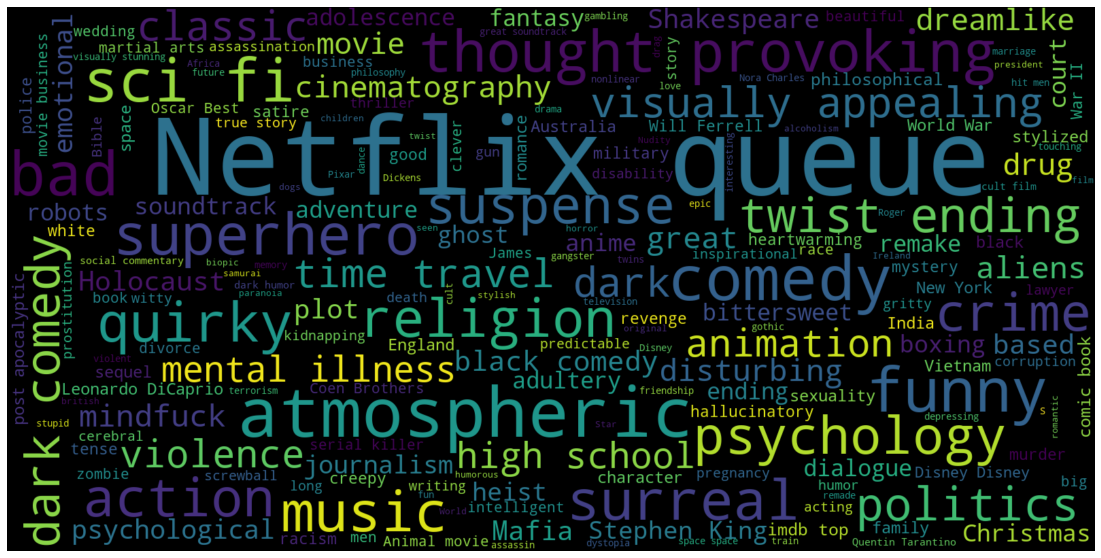

In [127]:
# Creating a visualizion for our tags wordcloud
text = " ".join(i for i in df_tags.tag)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [128]:
#genre_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title='Review Counts by Genre', xlabel='Genres',
#                                                ylabel='Number of Reviews', rot=45);

In [129]:
# df_tags.loc[df_tags['userId'] == 414].head()

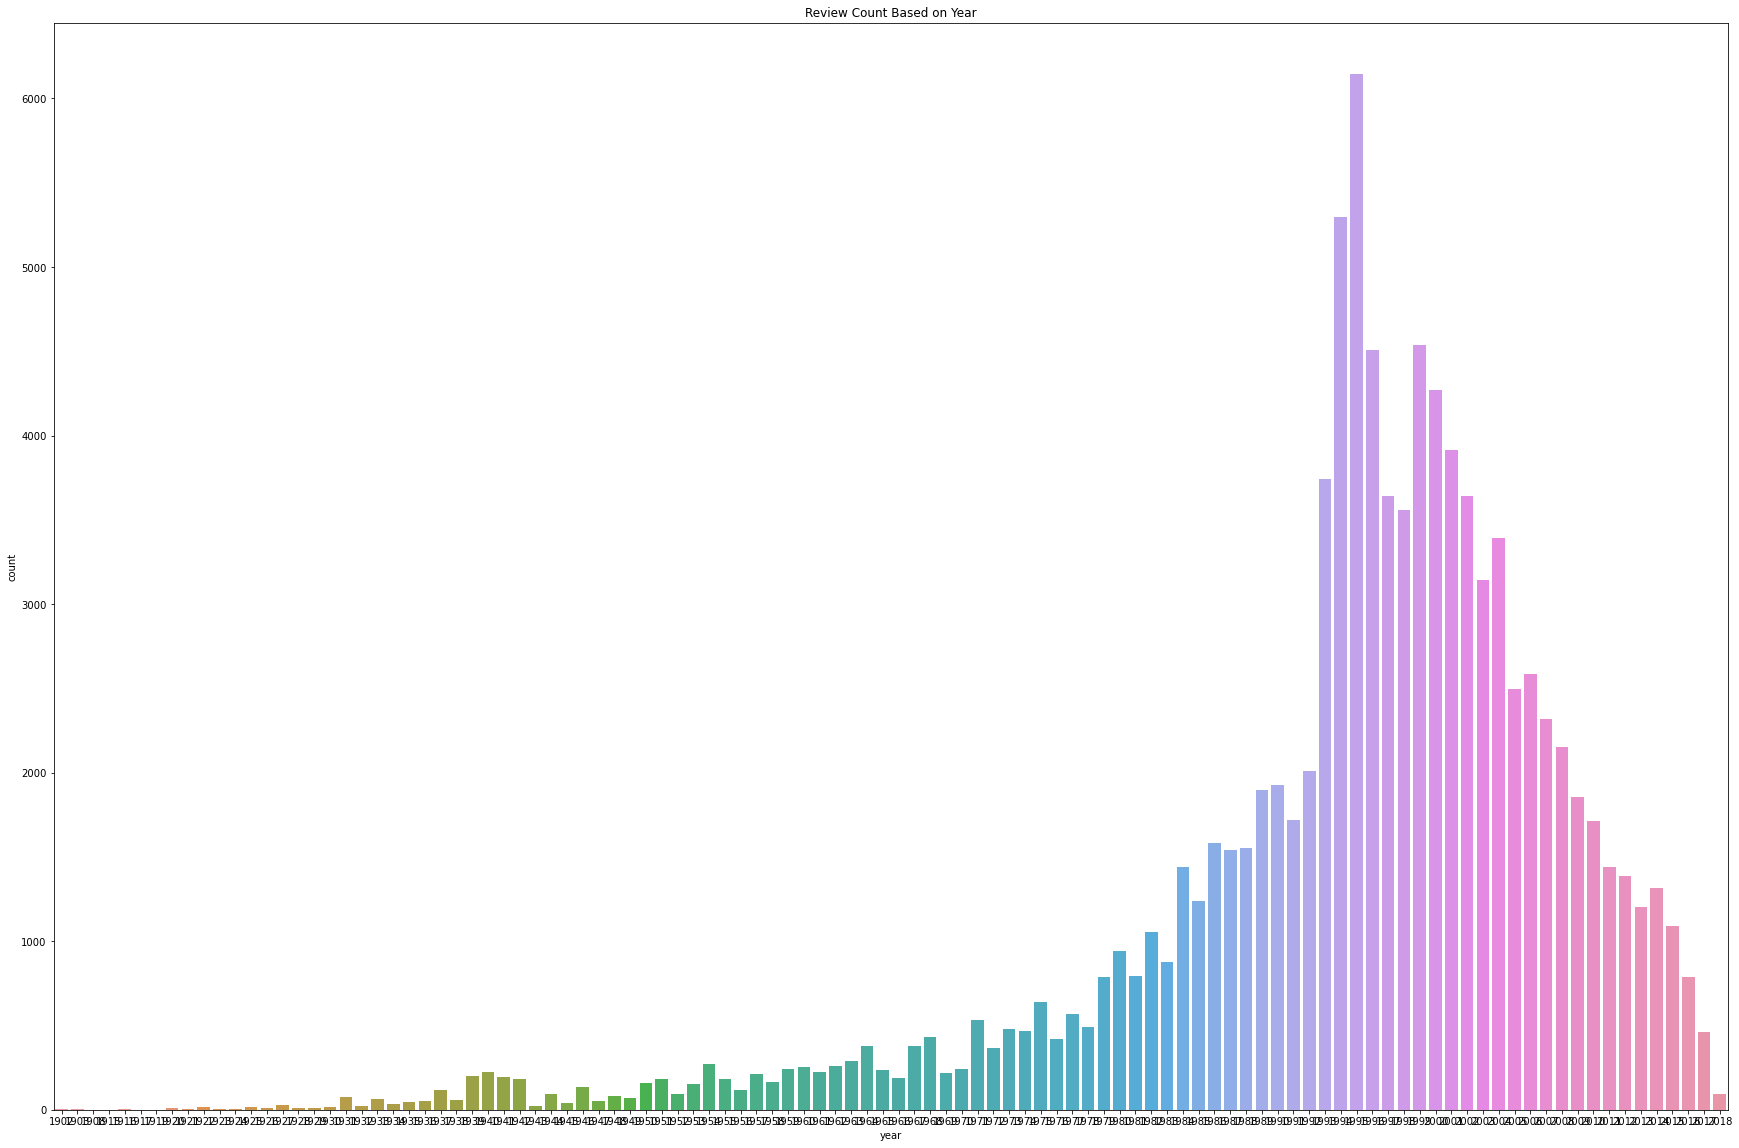

In [130]:
# All Reviews Based on Years
plt.figure(figsize=(30,20))
sns.countplot(data=movie, x='year')
plt.title('Review Count Based on Year');

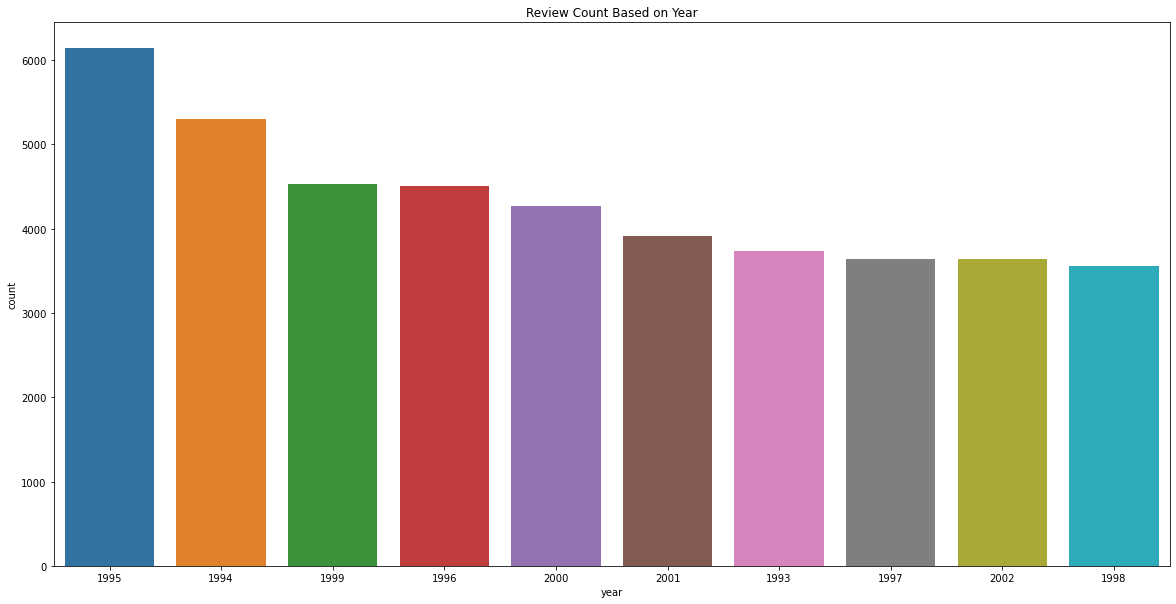

In [131]:
# Top 10 Review Count Based on Year
plt.figure(figsize=(20,10))
sns.countplot(data=movie, x='year', order=movie.year.value_counts().iloc[0:10].index)
plt.title('Review Count Based on Year');

In [132]:
# Taking a look at each genre individually to see what the rating breakdown is. Starting with Genre.
drama = movie.loc[movie['Drama'] == 1]

In [133]:
drama['Drama'].value_counts()

1    41923
Name: Drama, dtype: int64

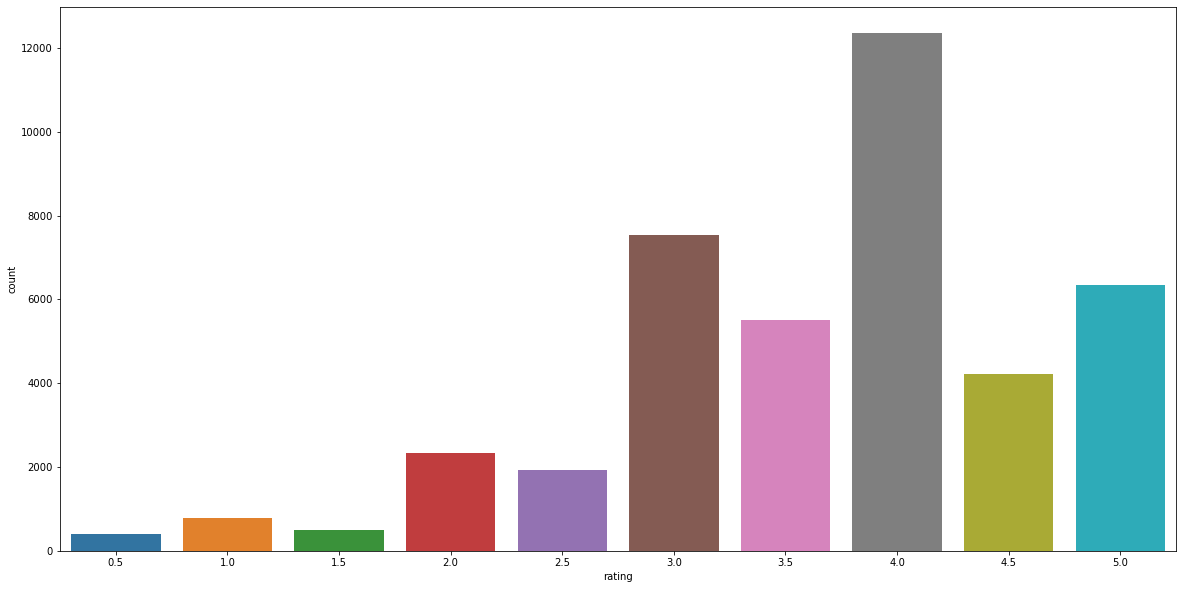

In [134]:
plt.figure(figsize=(20,10))
sns.countplot(data=drama, x='rating');

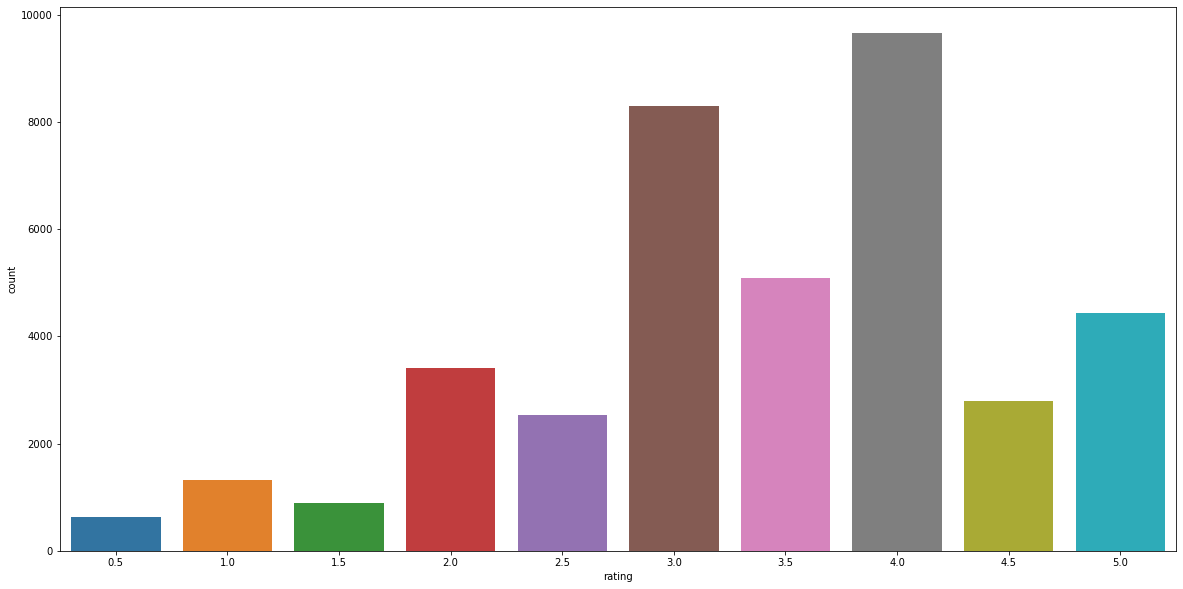

In [135]:
# Taking a look at Comedy individually to see what the rating breakdown is.
comedy = movie.loc[movie['Comedy'] == 1]
plt.figure(figsize=(20,10))
sns.countplot(data=comedy, x='rating');

In [136]:
comedy['Comedy'].value_counts()

1    39049
Name: Comedy, dtype: int64

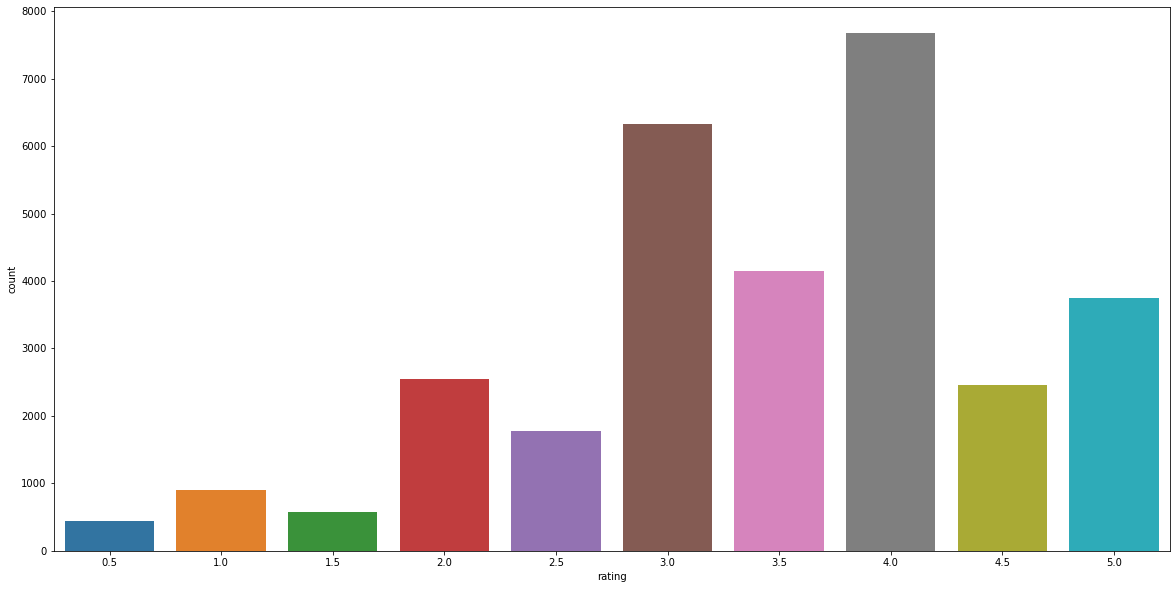

In [137]:
# Taking a look at Action individually to see what the rating breakdown is.
action = movie.loc[movie['Action'] == 1]
plt.figure(figsize=(20,10))
sns.countplot(data=action, x='rating');

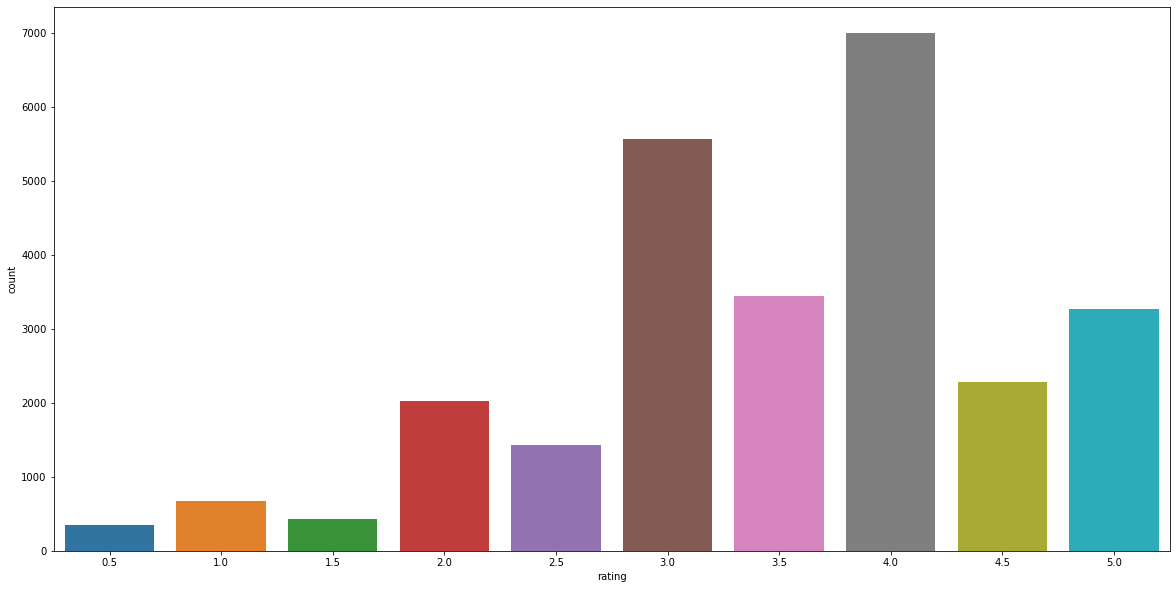

In [138]:
# Taking a look at Thriller individually to see what the rating breakdown is.
thriller = movie.loc[movie['Thriller'] == 1]
plt.figure(figsize=(20,10))
sns.countplot(data=thriller, x='rating');

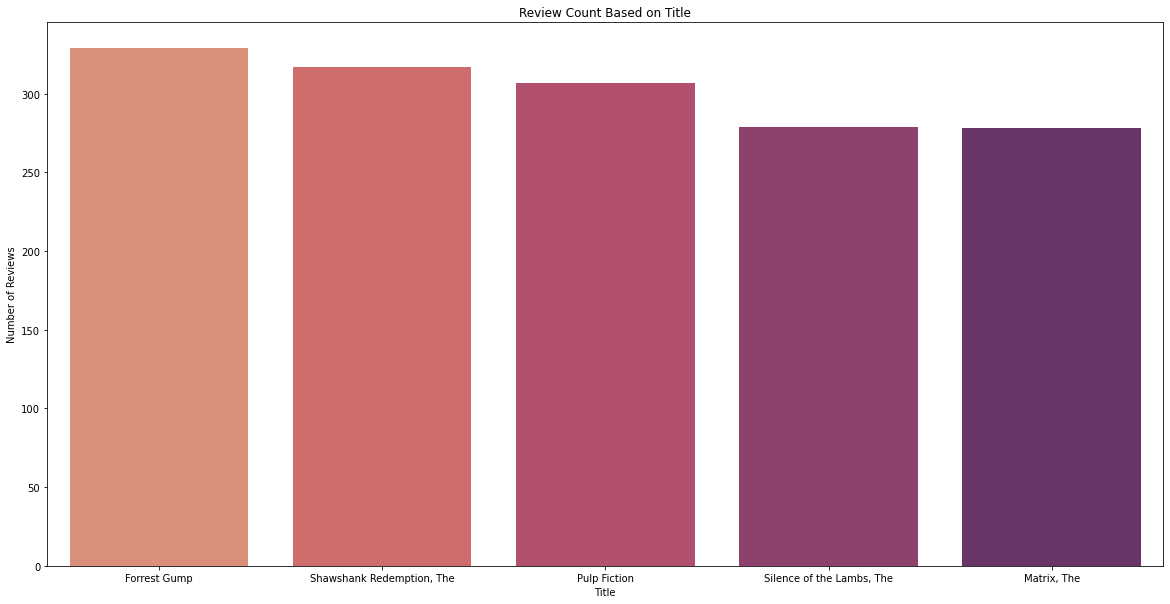

In [139]:
# Top 5 titles based on the number of reviews.
plt.figure(figsize=(20,10))
sns.countplot(data=movie, x='title', order=movie.title.value_counts().iloc[:5].index, palette='flare')
plt.ylabel("Number of Reviews")
plt.xlabel("Title")
plt.title('Review Count Based on Title');

# Data Preprocessing

Now that we've done our data cleaning and EDA, the team 

In [143]:
# Importing libraries for preprocessing and modeling. 
from surprise import BaselineOnly, Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split
from surprise.prediction_algorithms import SVD, KNNWithMeans, KNNBasic, KNNBaseline, knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

In [141]:
# Creating a reader so that our dataframe can be understood by the Surprise library.
reader = Reader(rating_scale=(0.5, 5))

# Creating the dataframe to be equivalent to have the columns corresponds to 
# user id, item id, and ratings (in the specified order).
movie_surprise = Dataset.load_from_df(movie[['userId', 'movieId', 'rating']], reader)

In [142]:
# Train-Test split.
train, test = train_test_split(movie_surprise, test_size=0.2, random_state=42)

# Modeling

Now that we have our train-test split for our data we can no start with taking a look at all of our models! We start with the initial baseline model, which we decided to go with a baseline item to item recommendation for.

In [145]:
# Taking a look at our user to item ratio.
print('Number of users: ', train.n_users, '\n')
print('Number of items: ', train.n_items, '\n')

Number of users:  610 

Number of items:  8959 



We plan on doing both User-User and Item-Item similarity, but for now we start our analysis based on Item-Item similarity.

## Item-Item Similarity

### Cosine Baseline Model

In [146]:
# Item to Item similarity based on Cosine
sim_cos = {'name':'cosine', 'user_based':False}

In [148]:
# Fitting our first basic model.
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(train)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [149]:
# Taking a look at the similarity matrix for our fitted model.
basic.sim

array([[1.        , 0.98161357, 0.77096175, ..., 1.        , 1.        ,
        1.        ],
       [0.98161357, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.77096175, 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [151]:
# Predicting the accuracy of our baseline model.
predictions = basic.test(test)
print(accuracy.rmse(predictions))

RMSE: 0.9720
0.9720337803647293


For our Cosine baseline model we have an RMSE of 0.9720, which means essentially that our recommendation model is off by about 1 point for every recommendation we try to predict.

### Pearson baseline Model

In [152]:
# Fitting and predicting a baseline Pearson model.
sim_pearson = {'name':'pearson', 'user_based':False}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(train)
predictions = basic_pearson.test(test)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9684
0.9683632287059404


Slowly improving!

### Pearson KNNWithMeans Model

In [154]:
sim_pearson = {'name':'pearson', 'user_based':False}
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(train)
predictions = knn_means.test(test)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8974
0.8974282632075296


Excellent! Another improvement. This model uses the Pearson correlation, but also looks at the mean rating of each user.

## User-User Similarity

The plan is to go through the same models as above and see if User-User Similarities has a better RMSE than Item-Item.

## Cosine baseline model

In [155]:
# Item to Item similarity based on Cosine
sim_cos = {'name':'cosine', 'user_based':True}
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(train)
predictions = basic.test(test)
print(accuracy.rmse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9672
0.9671630935763456


Hey hey better than our User-User cosine baseline model.

In [156]:
# Fitting and predicting a baseline Pearson model.
sim_pearson = {'name':'pearson', 'user_based':True}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(train)
predictions = basic_pearson.test(test)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9685
0.9685357342594889


A little bit worse than our cosine baseline. Let's try the KNNWithMeans and Cosine.

In [157]:
sim_pearson = {'name':'cosine', 'user_based':True}
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(train)
predictions = knn_means.test(test)
print(accuracy.rmse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9000
0.8999771212320147


Close, but not better than our item-item similarity based Pearson.

## GridSearch with Model-Based Methods

In [158]:
# param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
#gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
#gs_model.fit(movie_surprise)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  66 out of  80 | elapsed:    9.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.8s finished


In [160]:
# Best RMSE score
print(gs_model.best_score["rmse"])

0.8903328498943065


In [162]:
# Combination of parameters that gave the best RMSE score
print(gs_model.best_params["rmse"])

{'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}
